**How long does it take for flu symptoms to show after exposure? And what if you don't know when people caught the virus? Do salary and work-life balance influence the speed of employee turnover? Lots of real-life challenges require survival analysis to robustly estimate the time until an event to help us draw insights from time-to-event distributions. This course introduces you to the basic concepts of survival analysis. Through hands-on practice, you’ll learn how to compute, visualize, interpret, and compare survival curves using Kaplan-Meier, Weibull, and Cox PH models. By the end of this course, you’ll be able to model survival distributions, build pretty plots of survival curves, and even predict survival durations.**

In [67]:
import pandas as pd
import numpy as np
from lifelines import KaplanMeierFitter, WeibullAFTFitter, WeibullFitter, ExponentialFitter, LogNormalFitter, CoxPHFitter
from lifelines.plotting import qq_plot
import matplotlib.pyplot as plt
from lifelines.statistics import logrank_test

In [79]:
regime_durations = pd.read_csv("dd.csv")
prison = pd.read_csv('rossi.csv')
employees = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

## Introduction to Survival Analysis

In [21]:
# Print first row
print(regime_durations.head(1))

# Count censored data
count = len(regime_durations[regime_durations['observed'] == 0])

# Print the count to console
print(count)

      ctryname  cowcode2  politycode un_region_name un_continent_name  \
0  Afghanistan       700       700.0  Southern Asia              Asia   

                 ehead                                     leaderspellreg  \
0  Mohammad Zahir Shah  Mohammad Zahir Shah.Afghanistan.1946.1952.Mona...   

       democracy    regime  start_year  duration  observed  
0  Non-democracy  Monarchy        1946         7         1  
340


**Given 340 regime durations (about 18% of your data) are censored, you may use survival analysis to handle the data.**

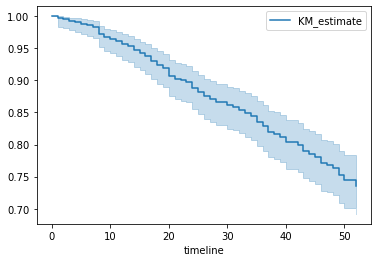

In [22]:
prison_kmf = lifelines.KaplanMeierFitter()
prison_kmf.fit(durations=prison['week'], event_observed=prison['arrest'])

# Plot the survival function
prison_kmf.plot_survival_function()

# Show the plot
plt.show()

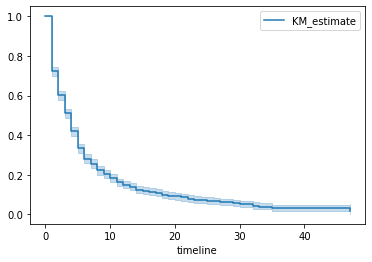

In [23]:
# Instantiate a KaplanMeierFitter object kmf
kmf = lifelines.KaplanMeierFitter()

# Fit the KaplanMeierFitter object to the data
kmf.fit(durations=regime_durations['duration'], 
        event_observed=regime_durations['observed'])

# Visualize and show the survival curve
kmf.plot_survival_function()
plt.show()

**Approximately 50% of regimes last shorter than 4 years, and the other regimes last 4 years or longer.**

## Survival Curve Estimation

In [24]:
pericardial_effusion = pd.read_csv('echocardiogram.csv')

In [34]:
has_pericardial_effusion = pericardial_effusion[pericardial_effusion['pericardialeffusion'] == 1].dropna()
none_pericardial_effusion = pericardial_effusion[pericardial_effusion['pericardialeffusion'] == 0].dropna()

In [35]:
# Instantiate Kaplan Meier object for patients with and without pericardial effusion
kmf_has_pe = KaplanMeierFitter()
kmf_no_pe = KaplanMeierFitter()

# Fit Kaplan Meier estimators to each DataFrame
kmf_has_pe.fit(durations=has_pericardial_effusion['survival'], 
               event_observed=has_pericardial_effusion['pericardialeffusion'])
kmf_no_pe.fit(durations=none_pericardial_effusion['survival'], 
              event_observed=none_pericardial_effusion['pericardialeffusion'])

# Print out the median survival duration of each group
print("The median survival duration (months) of patients with pericardial effusion: ", kmf_has_pe.median_survival_time_)
print("The median survival duration (months) of patients without pericardial effusion: ", kmf_no_pe.median_survival_time_)

The median survival duration (months) of patients with pericardial effusion:  16.0
The median survival duration (months) of patients without pericardial effusion:  inf


**Patients without pericardial effusion have a longer survival time.**

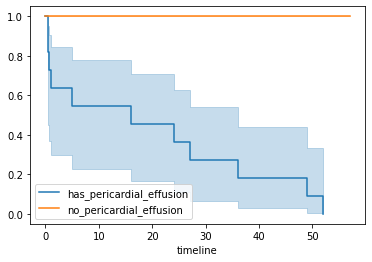

In [36]:
# Fit kmf to patients with pericardial effusion
kmf.fit(has_pericardial_effusion['survival'], has_pericardial_effusion['pericardialeffusion'], label='has_pericardial_effusion')

# Create a plot of the survival function
surv_plot = kmf.plot()

# Fit kmf to patients without pericardial effusion
kmf.fit(none_pericardial_effusion['survival'], none_pericardial_effusion['pericardialeffusion'], label='no_pericardial_effusion')

# Plot new survival function and show plot
kmf.plot(ax=surv_plot)
plt.show()

In [39]:
# Run log-rank test to compare patients with and without pericardial effusion
patient_results = logrank_test(durations_A = has_pericardial_effusion['survival'], 
                               durations_B = none_pericardial_effusion['survival'], 
                               event_observed_A = has_pericardial_effusion['pericardialeffusion'], 
                               event_observed_B = none_pericardial_effusion['pericardialeffusion'])

# Print out the p-value of log-rank test results
print(patient_results.p_value)
print(patient_results.print_summary)

4.406392312090019e-13
<bound method StatisticalResult.print_summary of <lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          52.45 <0.005     41.05>


In [49]:
heart_patients = pericardial_effusion.drop('name', axis = 1).dropna()

In [50]:
# Import WeibullAFTFitter and instantiate
aft = WeibullAFTFitter()

# Fit heart_patients data into aft
aft.fit(heart_patients, duration_col='survival', event_col='alive')

# Print the summary
print(aft.summary)

# Calculate the exponential of EPSS coefficient
exp_epss = np.exp(aft.params_.loc['lambda_'].loc['epss'])
print('When EPSS increases by 1, the average survival duration changes by a factor of ', exp_epss)

                                   coef     exp(coef)  se(coef)  \
param   covariate                                                 
lambda_ age                   -0.041991  9.588789e-01  0.033662   
        aliveat1              -4.096150  1.663661e-02  0.639879   
        epss                   0.019353  1.019542e+00  0.039512   
        fractionalshortening   1.674251  5.334796e+00  3.764110   
        group                  0.391402  1.479052e+00  0.560175   
        lvdd                  -0.887458  4.117011e-01  0.428969   
        mult                  -4.025024  1.786300e-02  4.481152   
        pericardialeffusion   -0.196524  8.215818e-01  0.510962   
        wallmotion-index      -2.574323  7.620543e-02  1.839650   
        wallmotion-score       0.190658  1.210045e+00  0.164456   
        Intercept             15.254207  4.215196e+06  6.072640   
rho_    Intercept              0.157670  1.170780e+00  0.162686   

                              coef lower 95%  coef upper 95% 

In [54]:
# Fit custom model
aft.fit(heart_patients, 
        duration_col='survival', 
        event_col='alive',
        formula='epss + age * lvdd')

# Print model summary
print(aft.summary)

                        coef     exp(coef)   se(coef)  coef lower 95%  \
param   covariate                                                       
lambda_ Intercept  51.056822  1.491750e+22  26.762664       -1.397035   
        age        -0.566008  5.677874e-01   0.386570       -1.323671   
        epss       -0.100263  9.045992e-01   0.065256       -0.228163   
        lvdd       -6.847141  1.062489e-03   4.901233      -16.453381   
        age:lvdd    0.081680  1.085109e+00   0.071650       -0.058751   
rho_    Intercept  -0.710818  4.912422e-01   0.191766       -1.086673   

                   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%  \
param   covariate                                                             
lambda_ Intercept      103.510679         2.473293e-01         8.997395e+44   
        age              0.191655         2.661564e-01         1.211252e+00   
        epss             0.027637         7.959943e-01         1.028022e+00   
        lvdd        

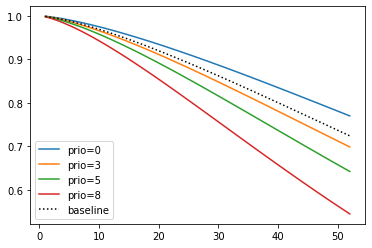

In [55]:
# Fit data to aft
aft.fit(df=prison,
        duration_col='week',
        event_col='arrest')

# Plot partial effects of prio
aft.plot_partial_effects_on_outcome(covariates = 'prio', values = [0,3,5,8])
plt.show()

### Predict re-arrest rate

In [56]:
# Predict median of new data
aft_pred = aft.predict_median(prison)

# Print average predicted time to arrest
print("On average, the median number of weeks for new released convicts to be arrested is: ", np.mean(aft_pred))

On average, the median number of weeks for new released convicts to be arrested is:  112.50826948536134


WeibullFitter 195.64562652366573
ExponentialFitter 220.70143789418736
LogNormalFitter 191.92623505113693


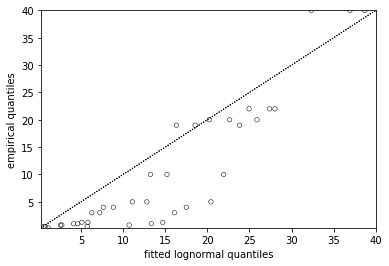

In [66]:
# Instantiate each fitter
wb = WeibullFitter()
exp = ExponentialFitter()
log = LogNormalFitter()

# Fit to data
for model in [wb, exp, log]:
  model.fit(durations=heart_patients['survival'],
            event_observed=heart_patients['alive'])
  # Print AIC
  print(model.__class__.__name__, model.AIC_)
  qq_plot(model)

**The LogNormalFitter model has the lowest AIC value, which means it is the best choice for the data out of all 3.**

## The Cox PH Model

In [68]:
# Instantiate CoxPHFitter class cph
cph = CoxPHFitter()

# Fit cph to data
cph.fit(df=prison, duration_col="week", event_col="arrest")

# Print model summary
print(cph.summary)

                coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                   
Unnamed: 0  0.001948   1.001950  0.000781        0.000418        0.003478   
fin        -0.370186   0.690606  0.191836       -0.746178        0.005807   
age        -0.054394   0.947059  0.021915       -0.097346       -0.011441   
race        0.349211   1.417948  0.308180       -0.254811        0.953233   
wexp       -0.157400   0.854362  0.212073       -0.573056        0.258256   
mar        -0.490568   0.612278  0.380124       -1.235598        0.254462   
paro       -0.067825   0.934424  0.196204       -0.452377        0.316727   
prio        0.104539   1.110199  0.029099        0.047506        0.161572   

            exp(coef) lower 95%  exp(coef) upper 95%         z         p  \
covariate                                                                  
Unnamed: 0             1.000418             1.003484  2.494927  0.012598   
f

**Question:**

*0.01, 0.05, and 0.1 are common thresholds to use for interpreting significance. Based on the model summary in the console, which sets of covariates are statistically significant at the 0.05 level?*

**age and prio.This means there is a strong correlation between the changes in `age` and `prio` and the hazards.**

In [69]:
# Instantiate CoxPHFitter class
custom_cph = CoxPHFitter()

# Fit custom model
custom_cph.fit(df=prison, duration_col="week", event_col="arrest", formula = "fin + age + prio")

# Print model summary
print(custom_cph.summary)

               coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                  
age       -0.067105   0.935097  0.020851       -0.107972       -0.026239   
fin       -0.346954   0.706838  0.190247       -0.719832        0.025923   
prio       0.096893   1.101743  0.027253        0.043478        0.150309   

           exp(coef) lower 95%  exp(coef) upper 95%         z         p  \
covariate                                                                 
age                   0.897653             0.974102 -3.218396  0.001289   
fin                   0.486834             1.026262 -1.823703  0.068197   
prio                  1.044437             1.162193  3.555273  0.000378   

            -log2(p)  
covariate             
age         9.599423  
fin         3.874147  
prio       11.370906  


**When there are many covariates, the problem of overfitting and multicollinearity might also exist for survival regression models. Read [here](https://lifelines.readthedocs.io/en/latest/fitters/regression/CoxPHFitter.html#lifelines.fitters.coxph_fitter.ParametricSplinePHFitter.fit) about more advanced regularization techniques for CoxPHFitter.**

In [70]:
# Instantiate CoxPHFitter class
cph = CoxPHFitter()

# Fit cph to data using all columns
cph.fit(df=prison, duration_col="week", event_col="arrest")

# Assign summary to summary_df
summary_df = cph.summary

# Create new column of survival time ratios
summary_df["surv_ratio"] = 1 / summary_df["exp(coef)"]

# Print surv_ratio for prio
print(summary_df.loc["prio", "surv_ratio"])

0.9007396222812754


**Based on the column you just created, what is the impact on time-to-arrest with a one-unit increase in prio?**

*Time-to-arrest decreases by 10%.*

### Plot covariate effects on survival

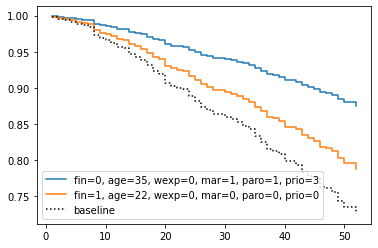

In [76]:
# Plot partial effects
cph.plot_partial_effects_on_outcome(covariates=["fin", "age", "wexp", "mar", "paro", "prio"],
                                   values=[[0, 35, 0, 1, 1, 3],
                                           [1, 22, 0, 0, 0, 0]])

# Show plot
plt.show()

**Marie is more likely to be arrested sooner because her survival probabilities are lower than those of Jack's.**

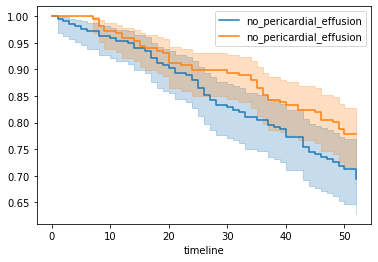

In [77]:
# Fit to fin == 0
kmf.fit(durations=prison[prison["fin"] == 0]["week"], 
        event_observed=prison[prison["fin"] == 0]["arrest"])

# Plot survival curve for fin == 0
ax = kmf.plot()

# Fit to fin == 1 and plot on ax
kmf.fit(durations=prison[prison["fin"] == 1]["week"], 
        event_observed=prison[prison["fin"] == 1]["arrest"])

# Plot survival curve for fin == 1
ax = kmf.plot(ax = ax)
plt.show()

In [78]:
# Check PH assumption
print(cph.check_assumptions(training_df=prison, p_value_threshold=0.1))

C:\Users\anoop\Data Science\lib\site-packages\lifelines\fitters\mixins.py:108: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  for variable in self.params_.index & (columns or self.params_.index):


The ``p_value_threshold`` is set at 0.1. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
         test_name = proportional_hazard_test

---
                 test_statistic      p  -log2(p)
Unnamed: 0 km              1.79   0.18      2.47
           rank            2.40   0.12      3.05
age        km             10.56 <0.005      9.76
           rank           10.88 <0.005     10.01
fin        km              0.08   0.77      0.37
           rank            0.08   0.78      0.36
mar        km              0.51   0.48      1.07
           rank            0.59   0.44      1.17
paro       km              0.09   0.76      0.39
           rank            0.10   0.75      0.42
prio       km              0.03   0.87      0.20
           rank            0.05   0.83      0.27
race       km              1.41   0.24      2.09
           rank            1.38   0.24      2.06
wexp       km              7.29   0.01      7.17
           rank            7.11   0.01      7.03



1. Variable 'age' failed the non-proportional test: p-value is 0.0010.

   Advice 1: the functional form of the variable 'age' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'age' using pd.cut, and then specify it in `strata=['age',
...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


2. Variable 'wexp' failed the non-proportional test: p-value is 0.0070.

   Advice: with so few unique values (only 2), you can include `strata=['wexp', ...]` in the call in
`.fit`. See documentation in link [E] below.

---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/lat

In [83]:
employees['Attrition'] = np.where(employees.Attrition == "Yes", 1, 0)

In [88]:
employees.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [89]:
employees_df = employees[['Attrition', 'TotalWorkingYears', 'EnvironmentSatisfaction','JobSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance', 'DistanceFromHome', 'PerformanceRating', 'DailyRate',
       'StockOptionLevel']]

In [91]:
# Instantiate a CoxPHFitter object cph
cph = CoxPHFitter()

# Fit cph on all covariates
cph.fit(employees_df, 'TotalWorkingYears', event_col='Attrition')

# Select employees that have not churned
current_employees = employees_df.loc[employees_df['Attrition'] == 0]

# Existing durations of employees that have not churned
current_employees_last_obs = current_employees['TotalWorkingYears']

In [92]:
# Predict survival function conditional on existing durations
cph.predict_survival_function(current_employees, 
                              conditional_after=current_employees_last_obs)

# Predict median remaining times for current employees
pred = cph.predict_median(current_employees, 
                          conditional_after=current_employees_last_obs)

# Print the smallest median remaining time
print(min(pred))

2.0
